**Overfitting** is when a model matches the training data almost perfectly, but does poorly in validation and other new data. 
 It happens when a model learns the detail and noise in the training data to the extent that it negatively impacts the performance of the model on new data

**How to Prevent Overfitting?**

* Cross-validation
* Train with more data
* Early stopping
* Regularization
* Ensembling.

**Underfitting** occurs when a model fails to capture important distinctions and patterns in the data, so it performs poorly even in training data. 
This happens when the model does not fit the data well enough. 

**How to Prevent Underfitting?**

* Increase the size or number of parameters in the ML model.
* Increase the complexity or type of the model.
* Increasing the training time until cost function in ML is minimised.

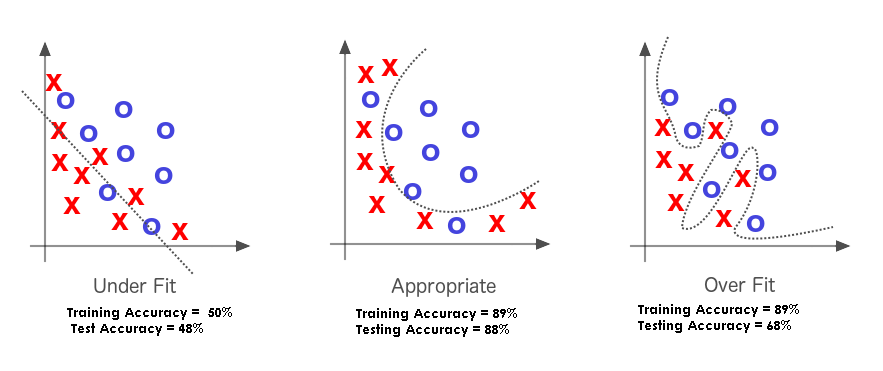

In [1]:
from IPython.display import Image
Image(filename='dpln_0107.png')

The solution to Underfitting is a bit explanatory on its own. Lets talk about preventing Overfitting.

We will examine one major solution here
* Cross Validation

Cross-validation is a statistical method used to estimate the skill of machine learning models.

It is commonly used in applied machine learning to compare and select a model for a given predictive modeling problem because it is easy to understand, easy to implement, and results in skill estimates that generally have a lower bias than other methods


You've already learnt how to use train_test_split to split the data, so you can measure *model quality* on the test data.

Cross-validation extends this approach to *model scoring* (or "model validation.") Compared to train_test_split, cross-validation gives you a more reliable measure of your model's quality, though it takes longer to run.

Imagine you have a dataset with 5000 rows. The *train_test_split* function has an argument for *test_size* that you can use to decide how many rows goes to the training set and how many goes to the test set.

The larger the test set, the more reliable your measures of model quality will be. You might typically keep about 20%-30% as a test dataset. But even with 1000 rows in the test set, there's some random chance in determining model scores. A model might do well on one set of 1000 rows, even if it would be inaccurate on a different 1000 rows. 

*The larger the test set, the less randomness (aka "noise") there is in our measure of model quality.*

How do we get a large test set without having a side effect on the training set? 

**The Cross-Validation Procedure**

In cross-validation, we run our modeling process on different subsets of the data to get multiple measures of model quality. For example, we could have 5 folds or experiments. We divide the data into 5 pieces, each being 20% of the full dataset.

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Let's import the data
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
train.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


The previous lesson [Building Your First Model](https://github.com/DSN-AIplus-Abeokuta/Pre-Bootcamp_Tutorials/blob/master/Beginners_Track/2.%20Basic%20ML/Class_2/Building%20Your%20First%20Model.ipynb) is a foundation to this, Kindly check it out

Rather than going back to what has been explained in the previous lesson, I will pick some columns from the dataset for this example

In [14]:
cols_to_use = ['MSSubClass', 'LotArea', 'Street', 'YearBuilt']
X = train[cols_to_use] #feature sets
y = train.SalePrice #Labels

Street is the only categorical column selected

In [6]:
X.Street.unique() #Check the unique values in the column

array(['Pave', 'Grvl'], dtype=object)

In [7]:
X['Street'] = X['Street'].map({'Pave':1,'Grvl':0, }) #replace the values with a numerical value
X

,MSSubClass,LotArea,Street,YearBuilt
0,60,8450,1,2003
1,20,9600,1,1976
2,60,11250,1,2001
3,70,9550,1,1915
4,60,14260,1,2000
...,...,...,...,...
1455,60,7917,1,1999
1456,20,13175,1,1978
1457,70,9042,1,1941
1458,20,9717,1,1950


Let's specify a pipeline of our modeling steps (It can be very difficult to do cross-validation properly if you arent't using pipelines).
Pipelines are a simple way to keep your data processing and modeling code organized. Learn about pipelines [here](https://www.kaggle.com/dansbecker/pipelines)

In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer 
my_pipeline = make_pipeline(SimpleImputer(), RandomForestRegressor())

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_squared_error')
print(scores)

[-2.60375345e+09 -3.26139204e+09 -3.59771388e+09 -2.96830303e+09
 -4.12922543e+09]


Check out [scikit-learn docs](https://scikit-learn.org/stable/modules/model_evaluation.html) for other scoring methods

In [13]:
print('Mean Absolute Error %2f' %(-1 * scores.mean()))

Mean Absolute Error 3312077565.608938


### References:
[Overfitting and Underfitting](https://www.kaggle.com/getting-started/175279)

[Kaggle Learn -Cross Validation](https://www.kaggle.com/dansbecker/cross-validation)

[A Gentle Introduction to k-fold Cross-Validation](https://machinelearningmastery.com/k-fold-cross-validation/)


### Exercise:
* Convert the code for your on-going classes over from train-test split to cross-validation. 
* Make sure to remove all code that divides your dataset into training and testing datasets. 
* Predict the test data on this new model

#### Note: 
Only 4 columns were selected in this lesson

Here is the foundation for this lesson
[Building Your First Model](https://github.com/DSN-AIplus-Abeokuta/Pre-Bootcamp_Tutorials/blob/master/Beginners_Track/2.%20Basic%20ML/Class_2/Building%20Your%20First%20Model.ipynb)